In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import collections
import csv
import numpy
import pandas as pd
from collections import Counter
from keras.applications.vgg16 import VGG16
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
train_path= 'train'
valid_path = 'valid'
test_path = 'test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10,shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)


Found 3833 images belonging to 4 classes.
Found 833 images belonging to 4 classes.
Found 892 images belonging to 4 classes.


In [5]:
imgs, labels = next(train_batches)

In [6]:
#plot images 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr , axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

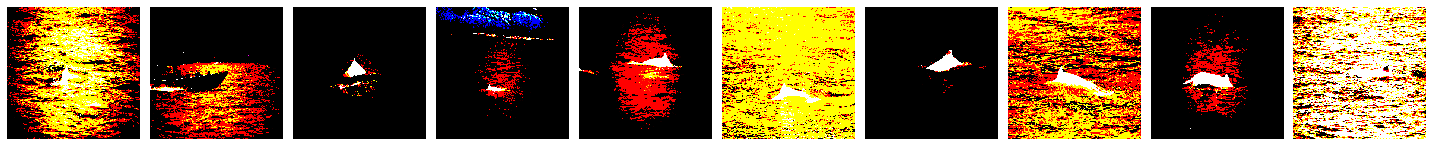

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [7]:
plotImages(imgs)
print(labels)

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Import model2 

In [9]:
vgg16= tf.keras.applications.vgg16.VGG16()
vgg16_model= Sequential()

for layer in vgg16.layers[:-4]:
    vgg16_model.add(layer)
    
for layer in vgg16_model.layers:
    layer.trainable=False
    
vgg16_model.add(Flatten())
vgg16_model.add(Dense(500, activation = 'relu'))
vgg16_model.add(BatchNormalization())
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(300, activation = 'relu'))
vgg16_model.add(BatchNormalization())
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(100, activation = 'relu'))
vgg16_model.add(BatchNormalization())
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(4, activation = 'softmax'))
  
#vgg16_model.summary()
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [105]:
history=vgg16_model.fit(x=train_batches,validation_data=valid_batches,epochs=20,verbose=2)

Epoch 1/20
68/68 - 169s - loss: 1.8205 - accuracy: 0.3985 - val_loss: 1.1512 - val_accuracy: 0.5125
Epoch 2/20
68/68 - 160s - loss: 1.2808 - accuracy: 0.5363 - val_loss: 0.9817 - val_accuracy: 0.5500
Epoch 3/20
68/68 - 162s - loss: 1.0656 - accuracy: 0.6000 - val_loss: 0.9489 - val_accuracy: 0.6250
Epoch 4/20
68/68 - 159s - loss: 0.9436 - accuracy: 0.6519 - val_loss: 0.9308 - val_accuracy: 0.5875
Epoch 5/20
68/68 - 160s - loss: 0.9238 - accuracy: 0.6593 - val_loss: 0.9809 - val_accuracy: 0.5500
Epoch 6/20
68/68 - 159s - loss: 0.8658 - accuracy: 0.7052 - val_loss: 1.0072 - val_accuracy: 0.5750
Epoch 7/20
68/68 - 160s - loss: 0.7930 - accuracy: 0.7244 - val_loss: 1.0887 - val_accuracy: 0.5625
Epoch 8/20
68/68 - 160s - loss: 0.7354 - accuracy: 0.7244 - val_loss: 1.0636 - val_accuracy: 0.5750
Epoch 9/20
68/68 - 160s - loss: 0.6749 - accuracy: 0.7393 - val_loss: 1.1242 - val_accuracy: 0.5375
Epoch 10/20
68/68 - 160s - loss: 0.7540 - accuracy: 0.7304 - val_loss: 1.0809 - val_accuracy: 0.6125

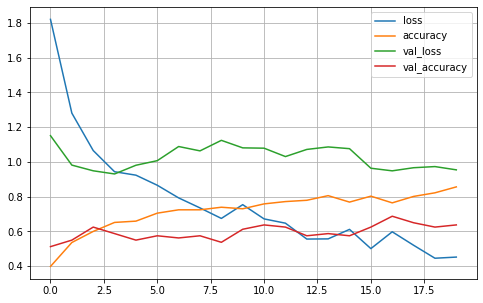

In [106]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [118]:
#evaluate

loss, accuracy =vgg16_model.evaluate(test_batches)
, f1_score, precision, recall

8/8 [==============================] - 12s 1s/step - loss: 0.9391 - accuracy: 0.6625


ValueError: not enough values to unpack (expected 5, got 2)

In [107]:
predictions = vgg16_model.predict(x=test_batches, verbose=0)

In [108]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [109]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [110]:
test_batches.class_indices 

{'health': 0, 'one': 1, 'two': 2, 'unused': 3}

Confusion matrix, without normalization
[[10  1  6  3]
 [ 0 12  8  0]
 [ 0  0 20  0]
 [ 3  1  5 11]]


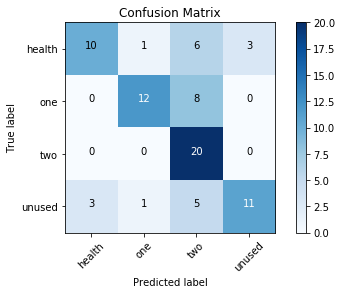

In [111]:
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

# more epochs

In [22]:
vgg16_model_2=vgg16_model
vgg16_model_2.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [112]:
counter = Counter(train_batches.classes)
max_val = float(max(counter.values()))
class_weights={class_id : max_val/num_images for class_id, num_images in counter.items()}

In [24]:
history_2=vgg16_model_2.fit(x=train_batches,validation_data=valid_batches, class_weight=class_weights,epochs=20,verbose=2)

Epoch 1/30
351/351 - 925s - loss: 2.3528 - accuracy: 0.6070 - val_loss: 1.2204 - val_accuracy: 0.5930
Epoch 2/30
351/351 - 937s - loss: 2.1545 - accuracy: 0.6113 - val_loss: 1.0039 - val_accuracy: 0.6446
Epoch 3/30
351/351 - 921s - loss: 2.0885 - accuracy: 0.6338 - val_loss: 0.9954 - val_accuracy: 0.6457
Epoch 4/30
351/351 - 922s - loss: 1.8747 - accuracy: 0.6690 - val_loss: 1.0747 - val_accuracy: 0.6256
Epoch 5/30
351/351 - 922s - loss: 1.8290 - accuracy: 0.6752 - val_loss: 1.0133 - val_accuracy: 0.6592
Epoch 6/30
351/351 - 910s - loss: 1.8506 - accuracy: 0.6741 - val_loss: 0.9895 - val_accuracy: 0.6570
Epoch 7/30
351/351 - 911s - loss: 1.6723 - accuracy: 0.6841 - val_loss: 1.0634 - val_accuracy: 0.6648
Epoch 8/30
351/351 - 912s - loss: 1.8388 - accuracy: 0.6849 - val_loss: 1.0529 - val_accuracy: 0.6457
Epoch 9/30
351/351 - 912s - loss: 1.5964 - accuracy: 0.7021 - val_loss: 1.2151 - val_accuracy: 0.6222
Epoch 10/30
351/351 - 912s - loss: 1.5827 - accuracy: 0.7029 - val_loss: 1.0839 - 

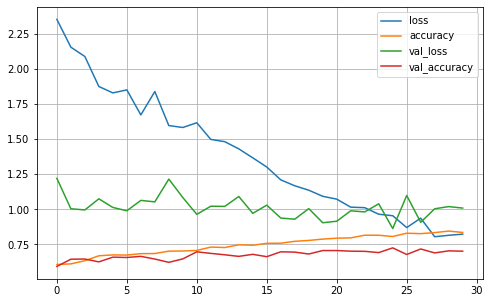

In [41]:
pd.DataFrame(history_2.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [26]:
predictions = vgg16_model_2.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[496   3  70  14]
 [  1  19  11   0]
 [ 40  15 118   0]
 [  0   0   0  10]]


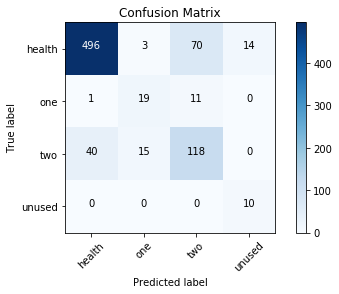

In [27]:
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [28]:
vgg16_model_2.evaluate(test_batches)

80/80 [==============================] - 75s 934ms/step - loss: 0.5332 - accuracy: 0.8068


[0.5332093834877014, 0.8067753911018372]

In [38]:
vgg16_model.evaluate(test_batches)

80/80 [==============================] - 77s 958ms/step - loss: 0.6453 - accuracy: 0.7478


[0.645321786403656, 0.7478042840957642]

# model 3 regularisation


In [ ]:
#try penalty = 0.01 , 0.02 ,..., 0.4

In [9]:
vgg16= tf.keras.applications.vgg16.VGG16()

vgg16_model_3=Sequential()

for layer in vgg16.layers[:-4]:
    vgg16_model_3.add(layer)
    
for layer in vgg16_model_3.layers:
    layer.trainable=False
    
vgg16_model_3.add(Flatten())
vgg16_model_3.add(Dense(500, activation = 'relu'))
vgg16_model_3.add(BatchNormalization())
vgg16_model_3.add(Dropout(0.5))
vgg16_model_3.add(Dense(300, activation = 'relu'))
vgg16_model_3.add(BatchNormalization())
vgg16_model_3.add(Dropout(0.5))
vgg16_model_3.add(Dense(100, activation = 'relu'))
vgg16_model_3.add(BatchNormalization())
vgg16_model_3.add(Dropout(0.5))
vgg16_model_3.add(Dense(4, activation = 'softmax'))
    
# adding regularization
#regularizer = tf.keras.regularizers.l2(penalty)
regularizer = tf.keras.regularizers.l2(0.01)

for layer in vgg16_model_3.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)

In [10]:
vgg16_model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [17]:
counter = Counter(train_batches.classes)
max_val = float(max(counter.values()))
class_weights={class_id : max_val/num_images for class_id, num_images in counter.items()}
vgg16_model_3.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history_3=vgg16_model_3.fit(x=train_batches,validation_data=valid_batches, class_weight=class_weights,epochs=20,verbose=2)

Epoch 1/20
351/351 - 957s - loss: 4.5616 - accuracy: 0.3525 - val_loss: 1.6616 - val_accuracy: 0.3307
Epoch 2/20
351/351 - 932s - loss: 3.6783 - accuracy: 0.4087 - val_loss: 1.6089 - val_accuracy: 0.3957
Epoch 3/20
351/351 - 923s - loss: 3.3425 - accuracy: 0.4430 - val_loss: 1.5343 - val_accuracy: 0.4395
Epoch 4/20
351/351 - 920s - loss: 2.9296 - accuracy: 0.4770 - val_loss: 1.5063 - val_accuracy: 0.4821
Epoch 5/20
351/351 - 912s - loss: 2.7978 - accuracy: 0.5027 - val_loss: 1.4467 - val_accuracy: 0.4966
Epoch 6/20
351/351 - 910s - loss: 2.7843 - accuracy: 0.5139 - val_loss: 1.5717 - val_accuracy: 0.4507
Epoch 7/20
351/351 - 908s - loss: 2.5840 - accuracy: 0.5398 - val_loss: 1.2813 - val_accuracy: 0.5404
Epoch 8/20
351/351 - 908s - loss: 2.4115 - accuracy: 0.5496 - val_loss: 1.1808 - val_accuracy: 0.5729
Epoch 9/20
351/351 - 908s - loss: 2.3274 - accuracy: 0.5687 - val_loss: 1.1999 - val_accuracy: 0.5762
Epoch 10/20
351/351 - 908s - loss: 2.1552 - accuracy: 0.5913 - val_loss: 1.3487 - 

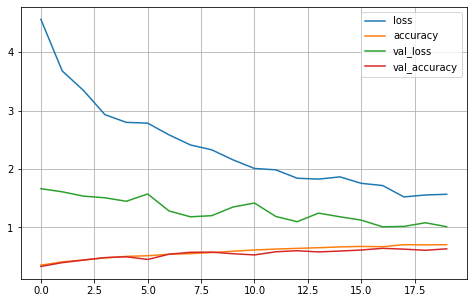

In [18]:
pd.DataFrame(history_3.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Confusion matrix, without normalization
[[438   4 124  17]
 [  1  15  15   0]
 [ 16  16 141   0]
 [  0   0   0  10]]


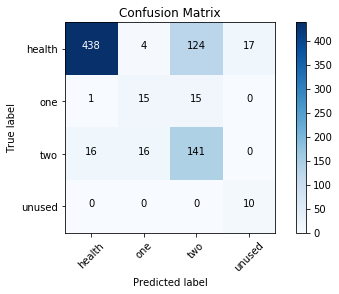

In [19]:
predictions = vgg16_model_3.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [26]:
vgg16_model_3.save('mark_2_all_regularization_point01.h5')

# l=0.1

In [9]:
vgg16= tf.keras.applications.vgg16.VGG16()

vgg16_model_4=Sequential()

for layer in vgg16.layers[:-4]:
    vgg16_model_4.add(layer)
    
for layer in vgg16_model_4.layers:
    layer.trainable=False
    
vgg16_model_4.add(Flatten())
vgg16_model_4.add(Dense(500, activation = 'relu'))
vgg16_model_4.add(BatchNormalization())
vgg16_model_4.add(Dropout(0.5))
vgg16_model_4.add(Dense(300, activation = 'relu'))
vgg16_model_4.add(BatchNormalization())
vgg16_model_4.add(Dropout(0.5))
vgg16_model_4.add(Dense(100, activation = 'relu'))
vgg16_model_4.add(BatchNormalization())
vgg16_model_4.add(Dropout(0.5))
vgg16_model_4.add(Dense(4, activation = 'softmax'))
    
# adding regularization
#regularizer = tf.keras.regularizers.l2(penalty)
regularizer = tf.keras.regularizers.l2(0.1)

for layer in vgg16_model_4.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)

In [10]:
vgg16_model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
counter = Counter(train_batches.classes)
max_val = float(max(counter.values()))
class_weights={class_id : max_val/num_images for class_id, num_images in counter.items()}
vgg16_model_4.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
history_4=vgg16_model_4.fit(x=train_batches,validation_data=valid_batches, class_weight=class_weights,epochs=20,verbose=2)

Epoch 1/20
451/451 - 1150s - loss: 2.6424 - accuracy: 0.4754 - val_loss: 1.3195 - val_accuracy: 0.4260
Epoch 2/20
451/451 - 1111s - loss: 1.9527 - accuracy: 0.5923 - val_loss: 1.4396 - val_accuracy: 0.4350
Epoch 3/20
451/451 - 1172s - loss: 1.6703 - accuracy: 0.6477 - val_loss: 1.0940 - val_accuracy: 0.5493
Epoch 4/20
451/451 - 1417s - loss: 1.5072 - accuracy: 0.6764 - val_loss: 1.0540 - val_accuracy: 0.6065
Epoch 5/20
451/451 - 1410s - loss: 1.4225 - accuracy: 0.6854 - val_loss: 1.1634 - val_accuracy: 0.5852
Epoch 6/20
451/451 - 1402s - loss: 1.3547 - accuracy: 0.7127 - val_loss: 1.0414 - val_accuracy: 0.6166
Epoch 7/20
451/451 - 1412s - loss: 1.2156 - accuracy: 0.7343 - val_loss: 0.9360 - val_accuracy: 0.6390
Epoch 8/20
451/451 - 1419s - loss: 1.1554 - accuracy: 0.7429 - val_loss: 0.9302 - val_accuracy: 0.6480
Epoch 9/20
451/451 - 1403s - loss: 1.1236 - accuracy: 0.7564 - val_loss: 1.0432 - val_accuracy: 0.6379
Epoch 10/20
451/451 - 1407s - loss: 1.0512 - accuracy: 0.7702 - val_loss:

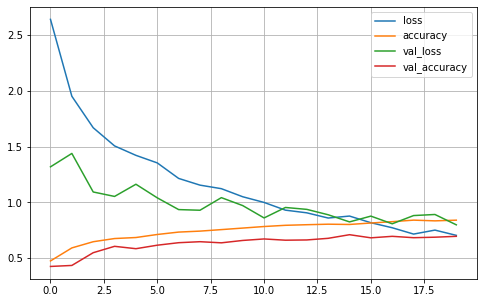

In [12]:
pd.DataFrame(history_4.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Confusion matrix, without normalization
[[489   2  79  13]
 [  1  12  18   0]
 [ 29  12 132   0]
 [  0   0   0  46]]


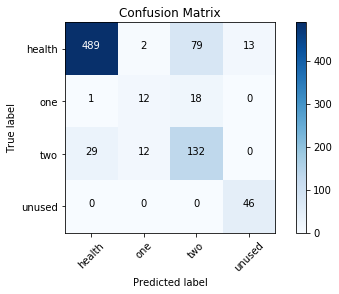

In [13]:
predictions = vgg16_model_4.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [14]:
vgg16_model_4.save('mark_7_all_regularization_one_unused_augmentation_point1.h5')

In [15]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = vgg16_model_4.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       583
           1       0.46      0.39      0.42        31
           2       0.58      0.76      0.66       173
           3       0.78      1.00      0.88        46

    accuracy                           0.82       833
   macro avg       0.69      0.75      0.71       833
weighted avg       0.84      0.82      0.82       833



# save predictions to csv

In [47]:
list_predictions=list(np.argmax(predictions, axis=-1))
list_filename = test_batches.filenames
final_predictions=[]
for item in zip(list_filename,list_predictions):
    final_predictions.append(item)

#predictions and labels 
arr = numpy.array(final_predictions)

# convert array into dataframe 
DF = pd.DataFrame(arr) 
  
# save the dataframe as a csv file 
DF.to_csv("data1.csv")

In [82]:
predictions[5]

array([0.20041779, 0.01408129, 0.7844744 , 0.00102653], dtype=float32)

In [78]:
np.argmax(predictions, axis=-1)

array([3, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,